# 가위바위보 분류기 만들기

## 데이터 준비하기

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image
import glob
import os

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

    
# 가위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

# 바위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 보 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

0 images to be resized.
0  images resized.
0 images to be resized.
0  images resized.
0 images to be resized.
0  images resized.


In [4]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  2


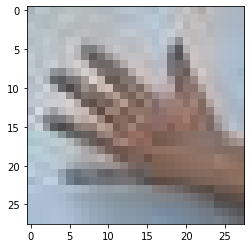

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[279])
print('라벨: ', y_train[279])

## 딥러닝 네트워크 설계하기

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 딥러닝 네트워크 학습시키기

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 18ms/step - loss: 26.7107 - accuracy: 0.3133
Epoch 2/10
10/10 [==============================] - 0s 20ms/step - loss: 9.1028 - accuracy: 0.5033
Epoch 3/10
10/10 [==============================] - 0s 20ms/step - loss: 3.0446 - accuracy: 0.4033
Epoch 4/10
10/10 [==============================] - 0s 20ms/step - loss: 0.8810 - accuracy: 0.7233
Epoch 5/10
10/10 [==============================] - 0s 20ms/step - loss: 0.5978 - accuracy: 0.8033
Epoch 6/10
10/10 [==============================] - 0s 20ms/step - loss: 0.3204 - accuracy: 0.8867
Epoch 7/10
10/10 [==============================] - 0s 20ms/step - loss: 0.2151 - accuracy: 0.9167
Epoch 8/10
10/10 [==============================] - 0s 21ms/step - loss: 0.1313 - accuracy: 0.9567
Epoch 9/10
10/10 [==============================] - 0s 19ms/step - loss: 0.1003 - accuracy: 0.9667
Epoch 10/10
10/10 [==============================] - 0s 19ms/step - loss: 0.0852 - accuracy: 0.9767


## 테스트 데이터셋 만들고 테스트 하기

In [8]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.0801 - accuracy: 0.9800
test_loss: 1.080060601234436
test_accuracy: 0.9800000190734863


## 성능 향상 위해 조정하기

In [10]:
n_channel_1= 32
n_channel_2= 64
n_dense= 64
n_train_epoch= 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 32ms/step - loss: 42.5248 - accuracy: 0.3000
Epoch 2/10
10/10 [==============================] - 0s 35ms/step - loss: 5.4525 - accuracy: 0.4267
Epoch 3/10
10/10 [==============================] - 0s 37ms/step - loss: 2.0366 - accuracy: 0.5033
Epoch 4/10
10/10 [==============================] - 0s 33ms/step - loss: 0.9385 - accuracy: 0.6567
Epoch 5/10
10/10 [==============================] - 0s 33ms/step - loss: 0.6318 - accuracy: 0.7533
Epoch 6/10
10/10 [==============================] - 0s 33ms/step - loss: 0.3946 - accuracy: 0.8567
Epoch 7/10
10/10 [==============================] - 0s 33ms/step - loss: 0.2227 - accuracy: 0.9233
Epoch 8/10
10/10 [==============================] - 0s 34ms/step - loss: 0.1469 - accuracy: 0.9533
Epoch 9/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0914 - accuracy: 0.9767
Epoch 10/10
10/10 [==============================] - 0s 33ms/step - loss: 0.0676 - accuracy: 0.9867


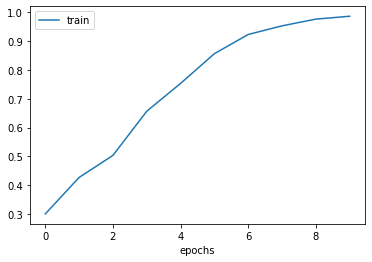

In [12]:
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('epochs')
plt.legend()

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.0831 - accuracy: 0.9867
test_loss: 1.083074688911438
test_accuracy: 0.9866666793823242
